# Python深層学習入門 12章 ディープラーニング入門

## 12.6 ディープラーニングを利用した学習

### 12.6.1 手書き数字認識を行う

ここでは、手書き文字認識を行う。データセットはMNIST。

モジュールをimportする。

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D
from keras.utils import to_categorical
import numpy as np
from keras.datasets import mnist, cifar10

MNISTを読み込む。

In [4]:
# MNISTをダウンロード
(x_train, y_train), (x_test, y_test) = mnist.load_data()
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

データの表示

MNISTに入っている先頭の10個のデータを表示してみる。

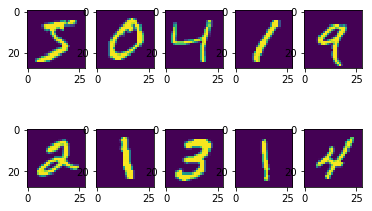

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
for i in range(10):
    img = x_train[i]
    plt.subplot(2,5,i+1)
    plt.imshow(img)
plt.show()

## 12.7 密結合ニューラルネットワークによる分類

### 12.7.1 密結合ニューラルネットワークによる分類の実践

In [8]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy']) # accuracyは正解率
model.fit(x_train, y_train, validation_data=[x_test, y_test], epochs=20)
loss, acc = model.evaluate(x_test, y_test)
print(f"Acc: {acc*100}%")

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 112us/step - loss: 0.6132 - acc: 0.8436 - val_loss: 0.3123 - val_acc: 0.9159
Epoch 2/20
60000/60000 [==============================] - 6s 107us/step - loss: 0.2787 - acc: 0.9220 - val_loss: 0.2258 - val_acc: 0.9344
Epoch 3/20
60000/60000 [==============================] - 6s 108us/step - loss: 0.2165 - acc: 0.9377 - val_loss: 0.2124 - val_acc: 0.9381
Epoch 4/20
60000/60000 [==============================] - 6s 107us/step - loss: 0.1858 - acc: 0.9465 - val_loss: 0.1781 - val_acc: 0.9481
Epoch 5/20
60000/60000 [==============================] - 6s 107us/step - loss: 0.1631 - acc: 0.9524 - val_loss: 0.1586 - val_acc: 0.9533
Epoch 6/20
60000/60000 [==============================] - 6s 107us/step - loss: 0.1489 - acc: 0.9571 - val_loss: 0.1455 - val_acc: 0.9585
Epoch 7/20
60000/60000 [==============================] - 6s 108us/step - loss: 0.1357 - acc: 0.9609 - val_loss: 0.1388 - 

## 12.8 密結合ニューラルネットワークによる分類(CIFAR10)

### 12.8.1 CIFAR10による画像分類の実践

CIFAR10とは、10カテゴリの一般物体認識用のデータセット

In [9]:
# CIFAR10をダウンロード
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

データを表示する。

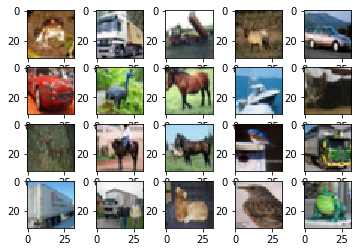

In [10]:
import matplotlib.pyplot as plt
for i in range(20):
    img = x_train[i]
    plt.subplot(4,5,i+1)
    plt.imshow(img)
plt.show()

**密結合ネットワークによる分類**

分類を学習してみる。
注意。CIFAR10はカラー画像なので入力のx軸とy軸と、そして3チャンネル分の画像がある。これをフラットにして1次元にする。

In [13]:
model = Sequential()
model.add(Flatten(input_shape=(32,32,3)))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, validation_data = [x_test,y_test], epochs=20)
loss, acc = model.evaluate(x_test, y_test)
print(f"Acc: {acc*100}%")

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 10s 192us/step - loss: 2.3083 - acc: 0.1020 - val_loss: 2.3134 - val_acc: 0.1001
Epoch 2/20
50000/50000 [==============================] - 10s 190us/step - loss: 2.2848 - acc: 0.1287 - val_loss: 2.2456 - val_acc: 0.1614
Epoch 3/20
50000/50000 [==============================] - 10s 195us/step - loss: 2.2428 - acc: 0.1451 - val_loss: 2.2770 - val_acc: 0.1182
Epoch 4/20
50000/50000 [==============================] - 10s 193us/step - loss: 2.1891 - acc: 0.1573 - val_loss: 2.1699 - val_acc: 0.1594
Epoch 5/20
50000/50000 [==============================] - 10s 192us/step - loss: 2.1675 - acc: 0.1590 - val_loss: 2.1439 - val_acc: 0.1739
Epoch 6/20
50000/50000 [==============================] - 10s 194us/step - loss: 2.1450 - acc: 0.1658 - val_loss: 2.1544 - val_acc: 0.1581
Epoch 7/20
50000/50000 [==============================] - 10s 202us/step - loss: 2.1650 - acc: 0.1662 - val_loss: 2.

正解率は十数パーセントとなり、高くない。MNISTに比べて難しい問題であることがわかる。
この正解率を上げるための方策を12.11節で行う。